In [1]:
#pip install bert-extractive-summarizer
#pip install torch
#pip install rouge
#pip install ipywidgets --user
#pip install bert-score
#pip install nltk
# pip install tensorflow
#pip install PyMuPDF==1.16.14
#pip install frontend 
#pip install pdfplumber 
#
#pip install fitz

pip install PyMuPDF 
pip install frontend 
pip install pdfplumber 
pip install PyMuPDF 
pip install fitz 
pip install rouge==1.0.0 
pip install streamlit==0.80.0 
pip install gensim==4.0.1 
pip install altair==4.1.0 
pip install pandas==1.2.3 
pip install sumy==0.8.1 
pip install gensim==3.8.3

In [2]:
from rouge import Rouge
import bert_score
from bert_score import score
import matplotlib.pyplot as plt
from bert_score import BERTScorer
import pandas as pd
from summarizer import Summarizer
from nltk.translate.bleu_score import sentence_bleu
import numpy
import tensorflow as tf 
##Print many staement at same time using the below command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import fitz
import glob
import pdfplumber
import re

In [3]:
F1_Bert=''
F1_Gpt2=''

In [4]:


pdf_dir = "./data"

pdf_files = glob.glob("%s/*.pdf" % pdf_dir)
all_abstracts = ""
for filename in pdf_files:
    print("+++++++++++++++++++++++++++++++++++++++++++",filename)
    doc = fitz.open(filename)
    print ("number of pages: %i" % doc.pageCount)

    page1 = doc.loadPage(0)
    page1text = page1.getText("text")

    page2 = doc.loadPage(1)
    page2text = page2.getText("text")

    try:
        try:
            Abstract = page1text.split("Introduction",1)[1]
            partitioned_string = page2text.split('Data')[0]
        except:
            Abstract = page1text.split("Introduction",1)[1]
            partitioned_string = Abstract.split('Data')[0]
    except Exception as IndexError:
        try:
            Abstract = page2text.split("Introduction",1)[1]
            partitioned_string = Abstract.split('Data')[0]
        except:
            Abstract = page2text.split("Introduction",1)[1]
            partitioned_string = Abstract.split('Data')[0]
    partitioned_string = re.sub('\S+@\S+',"",partitioned_string)
    partitioned_string = re.sub(r'[0-9]',"",partitioned_string)
    #partitioned_string = " ".join(re.findall(r"[a-zA-Z0-9]+",partitioned_string ))
    all_abstracts += partitioned_string
    
    
    print("*************",partitioned_string)

+++++++++++++++++++++++++++++++++++++++++++ ./data/1811.12015.pdf
number of pages: 19
************* Mobile phone indicators and their relation to the socioeconomic organisation of cities • November 
Within the urban sensing literature, mobile phone data play a prominent role as they form a source of passively
collected information (users do not need to make an explicit action to share their locations as would be the case in,
for example, location-based services or social networks), for large shares of populations (high shares of the world
population now owns a mobile device of any sort), captured at a rather high spatial resolution (in general, the density
of cell towers is high in urban areas). Mobile phone data research in an urban context has been applied to a diversity
of individual cities, or to international comparison of cities: Paris (Schneider et al., ); Maputo (Batran et al.,
), Dhaka (Lu et al., ), Santiago (Dannamann et al., ), Boston and Singapore (Xu et al., ), London,
Si

In [5]:
org_text=all_abstracts

In [6]:
bert_model = Summarizer()

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [7]:
org_text = '''Mobile phone indicators and their relation to the socioeconomic organisation of cities. November  Within the urban sensing literature, mobile phone data play 
       a prominent role as they form a source of passively collected information users do not need to make an explicit action to share their locations as would be the 
       case in, for example, location-based services or social networks  for large shares of populations high shares of the world population now owns a mobile device 
       of any sort  captured at a rather high spatial resolution in general, the density of cell towers is high in urban areas. Mobile phone data research in an urban 
       context has been applied to a diversity of individual cities, or to international comparison of cities: Paris Schneider et al. ; Maputo Batran et al.   
       Dhaka Lu et al.   Santiago Dannamann et al.   Boston and Singapore Xu et al.   London, Singapore and Beijing Zhong et al Research with a focus on 
       a single city, or a set of single cities, bears the advantage that it can easily tap into local knowledge when questioning the obtained, quantitative results. 
       This leads to better insights that can be used in urban planning and policy. I.. Mobile phone indicators One problem of the single-city focus in previous research 
       is that it can not ensure that observations made in one city usually a capital city of large population remain valid for other cities. As a consequence, it is unclear 
       whether findings can be generalized over different types of cities. The creation of mobile phone indicators avoids this problem. Since mobile phone indicators are typically 
       calculated for large user samples covering multiple cities, aggregation of individual-level indicators in space allows to compare findings between cities. In addition, 
       mobile phone indicators can be paired with other datasets so that multi-variate methods can support interpretation. In the case of mobile phone data, creating individual 
       indicators is possible at a nation-wide scale as datasets are mostly provided by national operators but it is not a straightforward task. For example, differences in the 
       spatial resolution of observations make it hard to create comparable indicators for individual mobility Vanhoof et al. c  and it is known that home detection methods, 
       which enable the spatial allocation and aggregation of individual users, still face severe challenges when it comes to validation and error estimation Vanhoof et al. b,a.
        Regardless some methodological challenges, creating mobile phone indicators and pairing them with census data is deemed promiscuous by multiple official statistics offices 
       and has been performed in academic literature on several occasions. Pappalardo et al.   for example, show how in France a mobile phone indicator on the diversity of movement 
       the mobility entropy relates directly to the European Deprivation Index EDI  Eagle et al.  describe the relation between regional calling patterns and economic development 
       in the UK, Decuyper et al.  discuss the relation between calling and purchase behavior and food security in a Central African country, and Frias-martinez et al.  
       investigate relations between several mobile phone indicators call, movement and purchase behavior and multiple census variables on education, demographics and purchase power 
       in a Latin American country. With the exception of Vanhoof et al. c  who study relations between mobile phone and census indicators for different urban areas in France, 
       one clear shortcoming of these studies is that their analyses are fixed on the nation-level only, leaving a missed opportunity to explore the empirical relations between human 
       mobility, social interactions, and the socioeconomic organisation of cities. I.. Sensitivity of urban scaling laws to city definitions When intending to compare values of 
       mobile phone indicators between cities, it is important to have a clear definition of what is considered a city. This is especially true since recent works on urban scaling 
       and Zipf’s law of census data Arcaute et al. ; Veneri, ; Cottineau et al.  have shown that the delineation of cities can substantially influence results and interpretations, 
       mainly because areas either included or not in different delineations have heterogeneous properties. Despite the fact that this issue is traditionally overlooked sometimes for 
       good reason, because data is only available for a single delineation  it is to suspect that average human activity sensed in general, and mobile phone indicators in particular, 
       are similarly sensitive to city delineation. Proceeding one step further to the relations between mobile phone indicators and census data, one can ask themselves the question to 
       which degree such relations will be influenced by city definitions. Indeed, what is unclear from previous work on mobile phone indicators is how statistical relations to census 
       indicators, whether obtained from multi-variate analysis at nation level or in the form of urban scaling laws, are determined by the way cities are defined. Before this question 
       gets answered, empirically produced relations will be insufficiently trustworthy to   K. BUSHMAN ET AL. these models we can then examine various hypotheses on whether specific 
       demographics of interest are associated with a change in mobility above and beyond of what was expected from the mobility patterns prior to stay-at-home orders. We focus on two 
       particular demographics, age and race, and show that show that minorities and older people, while significantly increasing their stay at home, this increase is smaller compared 
       to that white and younger people. We further provide some possible mechanisms that lead to this observation and show that income disparities can explain a sizable part of this 
       difference. The main contributions of our work can be summarized as follows: • Provide a Granger-causality analysis on the impact of stay-at-home orders on COVID-- related f
       atalities • Design a framework for quantifying adherence to social distancing according to various de- mographics • Design a dynamic dashboard to visualize both the raw 
       mobility data as well as, the results from our analysis. We believe that our work can provide critical information to local officials and policy makers. The rest of the 
       paper is organized as follows. Section  provides a description of the data we used for our analysis, as well as, a brief review on related to our study literature. Section  
       provides our Granger- causality analysis, while Section  introduces our framework for identifying the relationship between social distancing compliance and demographics. 
       We conclude our work and discuss its limitations and directions for future work in Section  A PREPRINT - JUNE ,  transportation data  taxi trips  socioeconomic 
       indicators per capita income, education rate, unemployment rate and deprivation index  sale price of residential properties []. Yes, this work also fits into the trends, 
       using the selling prices of properties. In this paper, we explore relations between mobile phone indicators and measures of socioeconomic status based on housing prices. 
       In doing so, we perform statistical analysis on mobility indicators derived from a CDR dataset and information of property prices in Budapest. Assuming that housing prices 
       characterize on a certain level the socioeconomic status we are exploring the relationship between the market price of properties at the neighborhood where residents live 
       or work and mobility indicators. Our hypothesis is that mobile phone indicators depict different types of spatial variations for different set of housing prices and therefore 
       hidden patterns and correlations can be revealed. The discovered interrelation between Socioeconomic Status SES and mobility habits of the residents may lead to a more 
       in-depth understanding of urban life and could support the optimization public transport, or decision making for real estate developers and could gain the efficiency of retail 
       processes. This paper is organized as follows: Section  gives a brief summary of the relevant literature. Section , describes the data used in this study. Section , 
       details the methodology used and the indicators and metrics generated. The mobility indicators obtained from the dataset recorded by cellular operator has been validated 
       by comparing with reports of the national mini census Section . Then, the results of the statistical analysis have been discussed in Section . The summary of findings 
       are given in Section .  Literature Review The understanding of human movements and recognition of behavior patterns that occur during daily life, in urban areas, 
       requires a systematic analysis of that human mobility. The evaluation of human travel is based on observations on the individual and group levels. In the last decades, 
       several novel datasets, based on vehicular GPS and cellular network records or social media information, became available which provided more accurate and sophisticated 
       char- acterization of people’s movements. Gonzales et al. used a dataset that included , user’s cellphone records, obtained for a half a year and showed that inhabitants 
       usually visit some highly frequented locations []. Song et al. evaluated a dataset representing , cellular phone user’s recorded for three months. The human movements derived 
       from the cellular information of the dataset has been found to be highly predictable []. Numerical indicators i.e. entropy-based metrics, radius of gyration have been 
       calculated to quantify the temporospatial distribution of people and their movements. Parija et al. [] applied Profile-based paging algorithm on CDRs in order to discover personal 
       human mobility patterns. The results suggest that the proposed algorithm is three times more efficient than conventional paging and two times more effective than various other 
       intelligent paging algorithms. These researches showed the hidden characteristics of individual movements and gave a tangible boost for further scientific efforts. The 
       demographic metrics and Socioeconomic Status SES seems the have significant relationship to individual travel behavior. Early studies aimed to investigate correlation of 
       the human travel characteristics and of SES [, ]. Cot- tineau and Vanhoof [] developed a model to explore the relationship between mobile phone data and traditional socioeconomic 
       information from the national census in French cities. Mobile phone indicators estimated from six months Call Detail Records, while census and administrative data are used to 
       characterize the socioeconomic orga- nization of French cities. The findings show that some mobile phone indicators relate significantly with different socioeconomic organization 
       of cities. Pokhriyal et al. [] used a computational framework to accurately predict the Global Multidimensional Poverty Index MPI in Senegal based on environmental data and CDR. 
       The methodology provides the accurate prediction of important dimensions of poverty: health, education, and standard of living the estimations have been validated using deprivations 
       calculated from census. In the last decade, CDRs have become a standard information source for analyzing the social characteristics of human mobility. A research work [] that 
       investigated the people’s daily activities in Shenzhen, China. The results identified a so-called, “north–south” differences of human activity, which findings are in good agreement 
       with the socioeconomic divide in the city. Some investigations suggest that the mobile phone data can be used to predict individual SES [] or regional socioe- conomic 
       characteristics []. Xu et al. [] used an analytical framework on large scale mobile phone and urban socioeconomic datasets to evaluate mobility patterns and SES. Six mobility 
       indicators, housing prices and per capita income in Singapore and Boston have been used to analyze the socioeconomic classes. It was found that phone users who are generally 
       wealthier, tend to travel shorter distances in Singapore, but longer, in Boston. The research brought interesting findings, but also showed that the relationship between mobility 
       and socioeconomic status is worth investigation in other cities and countries as well.'''

In [8]:
bert_summary = ''.join(bert_model(org_text))

In [9]:
file = open('org.txt', 'w')
file.write(org_text)
file.close()

file = open('hyps.txt', 'w')
file.write(bert_summary)
file.close()

12774

2581

#### Rouge measures recall: how much the words (and/or n-grams) in the human reference summaries appeared in the machine generated summaries.

In [10]:
r = Rouge()
score_bert=r.get_scores(bert_summary, org_text)

In [11]:
score_bert

[{'rouge-1': {'r': 0.3136729222520107, 'p': 1.0, 'f': 0.477551016772928},
  'rouge-2': {'r': 0.22634271099744246,
   'p': 0.9698630136986301,
   'f': 0.3670295459208324},
  'rouge-l': {'r': 0.3136729222520107, 'p': 1.0, 'f': 0.477551016772928}}]

In [12]:

with open("hyps.txt") as f:
    cands = [line.strip() for line in f]

with open("org.txt") as f:
    refs = [[line.strip() for line in f]]

### Bleu measures precision: how much the words (and/or n-grams) in the machine generated summaries appeared in the human reference summaries.

In [13]:
print('BLEU score -> {}'.format(sentence_bleu(refs, cands)))
blue_score_bert=sentence_bleu(refs, cands)

BLEU score -> 4.439568542862296e-80


/opt/anaconda3/envs/TextSumm/lib/python3.7/site-packages/nltk/translate/bleu_score.py:516: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


### N-Gram Blue Score

In [14]:
print('Individual 1-gram: %f' % sentence_bleu(refs, cands, weights=(1, 0, 0, 0)))
print('Individual 2-gram: %f' % sentence_bleu(refs, cands, weights=(0, 1, 0, 0)))
print('Individual 3-gram: %f' % sentence_bleu(refs, cands, weights=(0, 0, 1, 0)))
print('Individual 4-gram: %f' % sentence_bleu(refs, cands, weights=(0, 0, 0, 1)))

Individual 1-gram: 0.003402
Individual 2-gram: 0.002443
Individual 3-gram: 0.001323
Individual 4-gram: 0.000000


### If reference is more then one and candidate is only one then run the below code 

In [15]:
if len(cands)==1:
    P, R, F1 = score(cands, refs, lang='en', rescale_with_baseline=True)
    F1_bert=F1
    plt.hist(F1, bins=20)
    plt.xlabel("score")
    plt.ylabel("counts")
    plt.show()

### If we have more then one candidate and reference then run the below code 

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([0.5000007 , 0.5500007 , 0.60000074, 0.6500007 , 0.7000007 ,
        0.7500007 , 0.8000007 , 0.85000074, 0.9000007 , 0.9500007 ,
        1.0000007 , 1.0500007 , 1.1000007 , 1.1500007 , 1.2000008 ,
        1.2500007 , 1.3000007 , 1.3500007 , 1.4000007 , 1.4500008 ,
        1.5000007 ], dtype=float32),
 <BarContainer object of 20 artists>)

Text(0.5, 0, 'score')

Text(0, 0.5, 'counts')

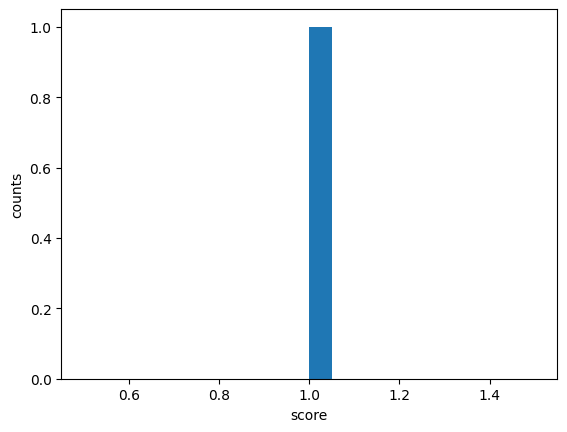

In [16]:
if len(cands)>1:
    scorer = BERTScorer(lang="en", rescale_with_baseline=True)
    P, R, F1 = scorer.score(cands, refs)
    F1_bert=F1
    plt.hist(F1, bins=20)
    plt.xlabel("score")
    plt.ylabel("counts")
    plt.show()

### Text Summarizer using GPT2

In [17]:
from summarizer import TransformerSummarizer

In [18]:
GPT2_model = TransformerSummarizer(transformer_type="GPT2",transformer_model_key="gpt2-medium")

In [19]:
gpt2_summ = ''.join(GPT2_model(org_text))

### Rough Score

In [20]:
r_gpt2 = Rouge()
score_gpt2=r.get_scores(gpt2_summ, org_text)
score_gpt2

[{'rouge-1': {'r': 0.22788203753351208, 'p': 1.0, 'f': 0.3711790362783891},
  'rouge-2': {'r': 0.1604859335038363,
   'p': 0.9653846153846154,
   'f': 0.2752192958011119},
  'rouge-l': {'r': 0.22788203753351208, 'p': 1.0, 'f': 0.3711790362783891}}]

In [21]:
file = open('hyps_gpt2.txt', 'w')
file.write(gpt2_summ)
file.close()

1886

In [22]:
with open("hyps_gpt2.txt") as f:
    cands_gpt2 = [line.strip() for line in f]

### Blue score

In [23]:
print('BLEU score -> {}'.format(sentence_bleu(refs, cands_gpt2)))

blue_score_gpt2=sentence_bleu(refs, cands_gpt2)

BLEU score -> 5.5530964567458195e-158


/opt/anaconda3/envs/TextSumm/lib/python3.7/site-packages/nltk/translate/bleu_score.py:516: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/opt/anaconda3/envs/TextSumm/lib/python3.7/site-packages/nltk/translate/bleu_score.py:516: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [24]:
print('Individual 1-gram: %f' % sentence_bleu(refs, cands_gpt2, weights=(1, 0, 0, 0)))
print('Individual 2-gram: %f' % sentence_bleu(refs, cands_gpt2, weights=(0, 1, 0, 0)))
print('Individual 3-gram: %f' % sentence_bleu(refs, cands_gpt2, weights=(0, 0, 1, 0)))
print('Individual 4-gram: %f' % sentence_bleu(refs, cands_gpt2, weights=(0, 0, 0, 1)))

Individual 1-gram: 0.000203
Individual 2-gram: 0.000114
Individual 3-gram: 0.000000
Individual 4-gram: 0.000000


### If reference is more then one and candidate is only one then run the below code 

In [25]:
if len(cands_gpt2)==1:
    P, R, F1 = score(cands_gpt2, refs, lang='en', rescale_with_baseline=True)
    F1_Gpt2=F1
    plt.hist(F1, bins=20)
    plt.xlabel("score")
    plt.ylabel("counts")
    plt.show()

### If we have more then one candidate and reference then run the below code 

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([-0.10636002, -0.05636002, -0.00636002,  0.04363998,  0.09363998,
         0.14363998,  0.19363998,  0.24363998,  0.29364   ,  0.34363997,
         0.39363998,  0.44364   ,  0.49363998,  0.54363996,  0.59363997,
         0.64364   ,  0.69364   ,  0.74364   ,  0.79363996,  0.84363997,
         0.89364   ], dtype=float32),
 <BarContainer object of 20 artists>)

Text(0.5, 0, 'score')

Text(0, 0.5, 'counts')

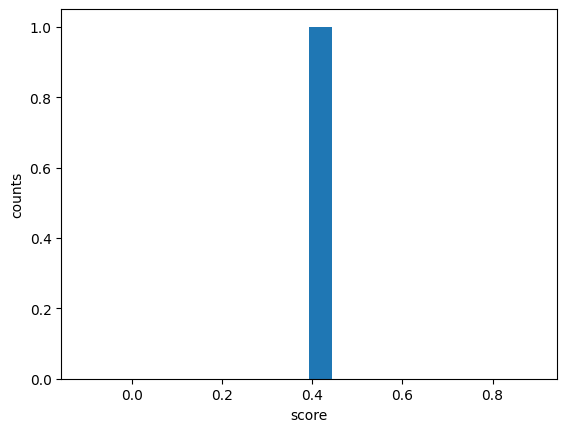

In [26]:
if len(cands_gpt2)>1:
    scorer = BERTScorer(lang="en", rescale_with_baseline=True)
    P, R, F1 = scorer.score(cands_gpt2, refs)
    F1_Gpt2=F1
    plt.hist(F1, bins=20)
    plt.xlabel("score")
    plt.ylabel("counts")
    plt.show()

In [27]:
#wrap rouge score in dataframe
df_bert = pd.DataFrame(score_bert[0]['rouge-1'], index=['BERT']).apply(lambda x: round(x,3))
df_gpt2 = pd.DataFrame(score_gpt2[0]['rouge-1'], index=['GPT 2']).apply(lambda x: round(x,3))

#concatenate and display
df_all_rough1= pd.concat([df_bert, df_gpt2]) 
df_all_rough1.columns.name = 'ROUGE-1'
df_all_rough1.index.name = 'All'
df_all_rough1[['f', 'p', 'r']]

ROUGE-1,f,p,r
All,,,
BERT,0.478,1.0,0.314
GPT 2,0.371,1.0,0.228


In [28]:
#wrap rouge score in dataframe
df_bert = pd.DataFrame(score_bert[0]['rouge-2'], index=['BERT']).apply(lambda x: round(x,3))
df_gpt2 = pd.DataFrame(score_gpt2[0]['rouge-2'], index=['GPT 2']).apply(lambda x: round(x,3))

#concatenate and display
df_all_rough2= pd.concat([df_bert, df_gpt2]) 
df_all_rough2.columns.name = 'ROUGE-2'
df_all_rough2.index.name = 'All'
df_all_rough2[['f', 'p', 'r']]

ROUGE-2,f,p,r
All,,,
BERT,0.367,0.970,0.226
GPT 2,0.275,0.965,0.160


In [30]:
#wrap rouge score in dataframe
df_bert = pd.DataFrame(score_bert[0]['rouge-l'], index=['BERT']).apply(lambda x: round(x,3))
df_gpt2 = pd.DataFrame(score_gpt2[0]['rouge-l'], index=['GPT 2']).apply(lambda x: round(x,3))

#concatenate and display
df_all_roughL= pd.concat([df_bert, df_gpt2]) 
df_all_roughL.columns.name = 'ROUGE-L'
df_all_roughL.index.name = 'All'
df_all_roughL[['f', 'p', 'r']]

ROUGE-L,f,p,r
All,,,
BERT,0.478,1.0,0.314
GPT 2,0.371,1.0,0.228


In [34]:
df_all_rough1
df_all_rough2
df_all_roughL

ROUGE-1,r,p,f
All,,,
BERT,0.314,1.0,0.478
GPT 2,0.228,1.0,0.371


ROUGE-2,r,p,f
All,,,
BERT,0.226,0.970,0.367
GPT 2,0.160,0.965,0.275


ROUGE-L,r,p,f
All,,,
BERT,0.314,1.0,0.478
GPT 2,0.228,1.0,0.371


In [31]:
print("Blue Score: ")

print('BERT: '+str(blue_score_bert))
print('Gpt2: '+str(blue_score_gpt2))


Blue Score: 
BERT: 4.439568542862296e-80
Gpt2: 5.5530964567458195e-158


In [32]:
bert_=tf.constant(F1_bert).numpy()
gpt2_=tf.constant(F1_Gpt2).numpy()


In [33]:
print("BERT Score: ")

print('BERT: '+str(bert_))
print('Gpt2: '+str(gpt2_))

BERT Score: 
BERT: [1.0000007]
Gpt2: [0.39363998]
